In [3]:
import numpy as np
import importlib
import sys
sys.path.append('/home/hugo/PostDoc1/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/fixed_density/"
from scipy.special import erfc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
def sliding_average(X, Y, window_size=5):

    half_window = window_size // 2
    
    # Initialize smoothed Y array
    Y_smooth = np.convolve(Y, np.ones(window_size)/window_size, mode='valid')
    
    # Adjust X to match the size of the smoothed Y array
    # This centers the window on the point being averaged
    start_index = (window_size - 1) // 2
    end_index = start_index + len(Y_smooth)
    X_smooth = X[start_index:end_index]
    
    return X_smooth, Y_smooth
avR = lambda L,N : 2*(np.exp(-1.5/(L/N)) * np.sqrt(L/N*6/np.pi)*(3+2*L/N) - 9*erfc(np.sqrt(3/2/(L/N))))/(9*L/N) #average distance between equilibrated nodes
Lcharact = lambda L,N : (np.sqrt(2*L/N/3))

In [4]:
print(1/avR(2*10**3,100))
print(Lcharact(2*10**3,100))

0.3745829897406521
3.6514837167011076


In [5]:
#NAMEs = ['N5_L100','N10_L200','N25_L500','N50','mu5e_2','mu5e_2_b','mu5e_2_c','mu5e_2_N50']
#NAMEs = ['N50','mu5e_2_N50','mu1e_1_N100']
#N = [5,10,25,50,50]
#L = [100,200,500,1000,1000]
density = 'mu5e_2_'
Names = ['N5','N10','N25','N50']#,'N100']
N = [5,10,25,50,100,100,100]
L = [100,200,500,1000,2000]
clusters = list()
for name in Names:
    print(name)
    clusters.append(Data_Treatement(media+density+name+'.hdf',data_type='cluster'))
#media_2 = "/media/hcleroy/Simulation_Res/Cluster/N/100/mu5e_2/"
#file_2 = "E-15_N100_ell2E3_kdiffE-4.hdf"
#clusters.append(Data_Treatement(media_2+file_2,data_type='cluster'))
#media_3 = "/media/hcleroy/Simulation_Res/Cluster/N/100/mu5e_2/"
#file_3 = "E-15_N100_ell2E3_kdiffE-3.hdf"
file_3 = "mu5e_2_N100_clustBIS.hdf"
clusters.append(Data_Treatement(media+file_3,data_type='cluster'))
for cluster  in clusters:
    cluster.average(num_bins=50,log_scale=True)

N5
N10
N25
N50


/home/hugo/PostDoc1/aging_condensates/Simulation/Parallel_Simulation/Data_Treatement.py:284: RuntimeWarning: invalid value encountered in divide
  weighted_average /=count


In [6]:
for cluster in clusters:
    print(cluster.attributes)

{'ell_tot': 100, 'Energy': -15, 'kdiff': 0.001, 'seed': 583684, 'Nlinker': 5, 'dimension': 3, 'step_tot': 100000, 'check_steps': 10000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (100, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args': {'NRG': True, 'Cluster': True, 'MSD': False, 'ISF': True, 'PCF': True, 'PCF_L': False}, 'ISF_arg': 2.0}
{'ell_tot': 200, 'Energy': -15, 'kdiff': 0.001, 'seed': 29701, 'Nlinker': 10, 'dimension': 3, 'step_tot': 500000, 'check_steps': 10000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (200, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args': {'NRG': True

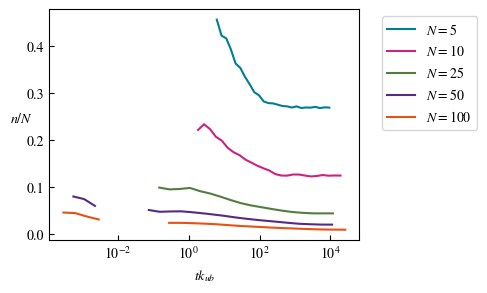

In [9]:
fig,ax = plt.subplots(figsize=(4,3))

Nmax = [5,10,15,30,30]
KDIFF = [10**-3,10**-3,10**-3,10**-3,10**-3,10**-4,10**-3]
labels = [r'$N = 5$',r'$N=10$',r'$N=25$',r'$N=50$',r'$N=100$']# $k_{diff} = 10^{-3}$',r'$N=100$'+' '+r'$k_{diff} = 10^{-3}$',r'$N=100$'+' '+r'$k_{diff} = 10^{-3}$']
CNRSColors = [(98./255.,196./255.,221./255.), (0/255.,41./255.,75./255.), (69./255.,100./255.,135./255.), (0./255.,126./255.,148./255.), (0./255.,68./255.,148./255.),(86./255.,42./255.,132./255.)]
Color_blind = [(0,126/255,148/255),(204/255,35/255,129/255),(84/255,125/255,61/255),(86/255,42/255,132/255),(231/255,81/255,19/255)]
MARKERS = ['o','v','D','P','*','h']
n=0
for cluster in clusters:#[i:i+1]):

    X,Y = cluster.binned_time,cluster.average_data[:,2]
    X,Y = sliding_average(X,Y,window_size=2)
    #if n ==1:
    #    Y[1] = 0.5*(Y[0]+Y[2])
    #X,Y = sliding_average(X,Y,2)
    #ax.scatter(X[0::2],Y[0::2]/N[n],label=labels[n],facecolor='none',edgecolors=CNRSColors[n],marker=MARKERS[n])
    ax.plot(X[0::2],Y[0::2]/N[n],label=labels[n],color=Color_blind[n])
    #ax.plot(X*KDIFF[n],Y,label=labels[n])
    n+=1

ax.set_xscale('log')    
#ax.set_yticks([0.,1.])
#ax.set_xticks([10**0,10**4])
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.set_xlabel(r'$tk_{ub}$')
ax.set_ylabel(r'$n/N$',rotation=0)

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

#plt.savefig('cluster_evolution.svg',transparent=True,bbox_inches='tight')

/media/hcleroy/anaconda3/lib/python3.11/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/media/hcleroy/anaconda3/lib/python3.11/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


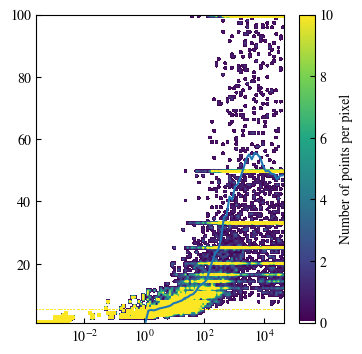

In [8]:
# check the cluster growth of the 10**-4 
#for x,y in zip(clusters[-1].time[:1],clusters[-1].data[:1,:,0]):
#    plt.scatter(x,y,color='black',s=0.1)
n_clust = -1
fig = plt.figure(figsize=(4,4))
ax = scatter_density(fig,clusters[n_clust].time.astype(float).flatten(),clusters[n_clust].data[:,:,0].astype(float).flatten(),nrows=1,ncols=1,pos=1,dpi=50,xlim=None,ylim=None,norm=True,resample=True,LogStretch=None,vmin=0,vmax=10)
ax.plot(clusters[n_clust].binned_time,clusters[n_clust].average_data[:,0])
ax.set_xscale('log')
#plt.xscale('log')

In [9]:
def bin_data(X, Y, bin_intervals):
    # Ensure X and Y are numpy arrays for easy indexing
    X = np.array(X)
    Y = np.array(Y)
    
    # Initialize lists to hold the binned values
    Xb = []
    Yb = []
    
    # Iterate over the bin intervals
    for i in range(len(bin_intervals) - 1):
        # Get the current bin range
        bin_start = bin_intervals[i]
        bin_end = bin_intervals[i + 1]
        
        # Find indices of X values that fall within the current bin
        indices = np.where((X >= bin_start) & (X < bin_end))[0]
        
        if len(indices) > 0:
            # Calculate the mean X and Y values for the current bin
            mean_X = np.mean(X[indices])
            mean_Y = np.mean(Y[indices])
            
            # Append the mean values to the binned lists
            Xb.append(mean_X)
            Yb.append(mean_Y)
    
    # Convert lists to numpy arrays before returning
    Xb = np.array(Xb)
    Yb = np.array(Yb)
    
    return Xb, Yb

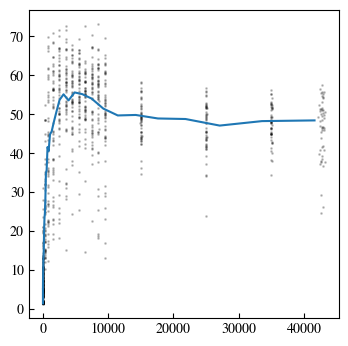

In [11]:
n_clust=-1
fig = plt.figure(figsize=(4,4))
#ax = scatter_density(fig,clusters[n_clust].time[1].astype(float).flatten(),clusters[n_clust].data[1,:,0].astype(float).flatten(),nrows=1,ncols=1,pos=1,dpi=10,xlim=None,ylim=None,norm=True,resample=True,LogStretch=None,vmin=0,vmax=0.1)
bins = [0,0.1,1,10,50,100,500,1000,2000,3000,4000,5000,6000,7000,8000,9000,10**4,2*10**4,3*10**4,4*10**4,5*10**4]
#meanY = np.zeros(len(bins)-4,dtype=float)
Ncurve = 50
for i in range(Ncurve):
    X,Y = bin_data(clusters[n_clust].time[i],clusters[n_clust].data[i,:,0],bins)
    plt.scatter(X,Y,color='black',alpha=0.2,s=1)
    #print(Y.shape)
    #print(meanY.shape)
    #meanY+=Y/Ncurve
#plt.plot(X,meanY)
plt.plot(clusters[n_clust].binned_time,clusters[n_clust].average_data[:,0])
#plt.xscale('log')